### Analysis of Mall Customers

In [2]:
import pandas as pd #data processing
import numpy as np #linear algebra
import seaborn as sns # library for visulazation
import matplotlib.pyplot as plt # data visulazation 
from sklearn.preprocessing import StandardScaler #Data standerdizing

#### Dataset overview

In [3]:
# import dataset
customers = pd.read_csv("Mall_Customers.csv")
#show dataset up to the first 10 rows
customers.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### EDA

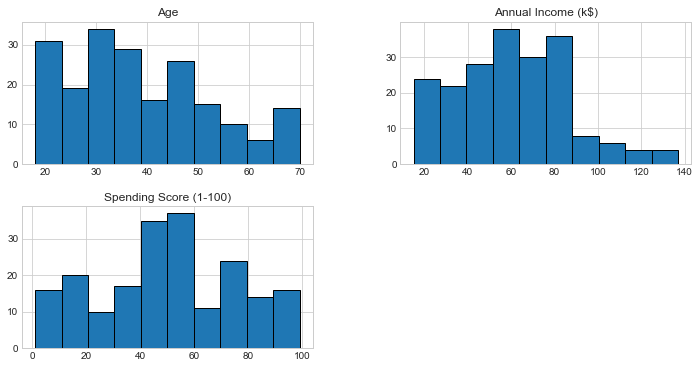

In [5]:
################################### Distribution Plots ####################################
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
plt.style.use('seaborn-whitegrid')
customers[features].hist(figsize= (12,6), edgecolor='black');

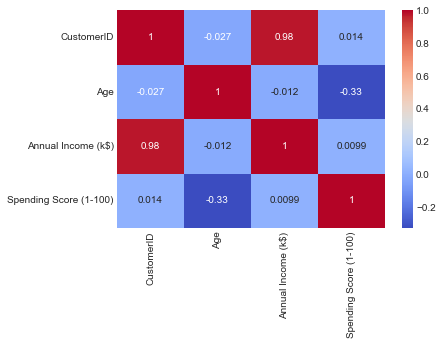

In [6]:
cor = customers.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()
# Spending score and Age have a negative correlation 
# so the older you are the less you spend
# Spending score and Annual income is a postivte correlation
# so the more you make the more you tend to spend

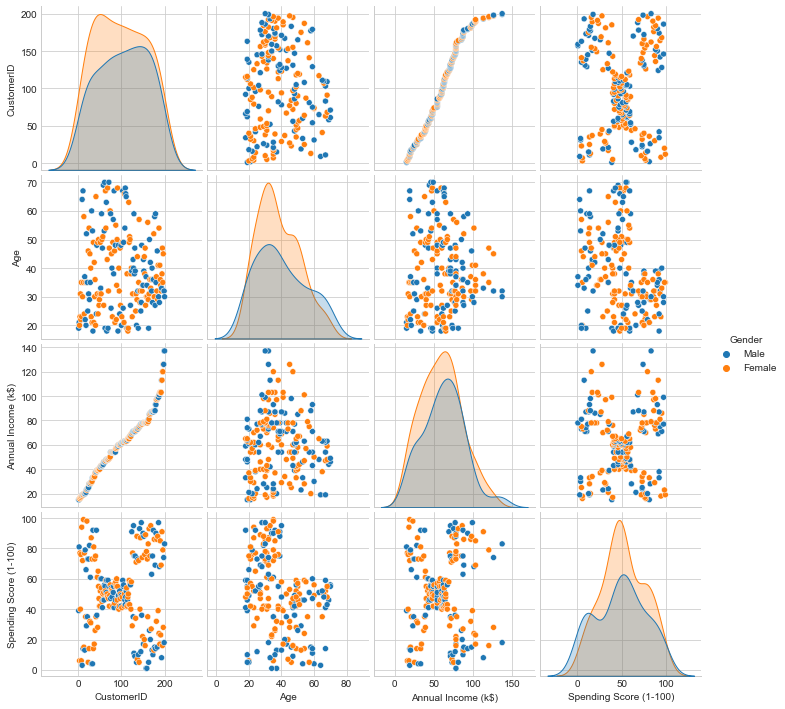

In [7]:
# here we look at the various disturbutions of gender with the values of the dataset
sns.pairplot(customers, hue = 'Gender');

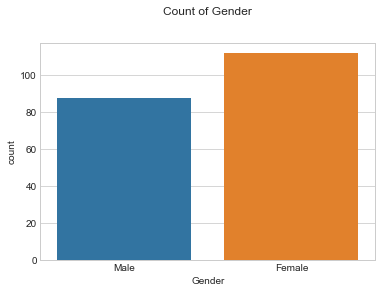

In [8]:
## we look at the amount of customers that are male and female
sns.countplot(data = customers, x = 'Gender')
plt.title('Count of Gender', y = 1.1);
# we see there are more femals than males that are customers

In [9]:
# replace gender Female and Male with 0 and 1 so we can work out spending score 
# we need to turn object/string into int
customers['Gender'] = customers['Gender'].apply({'Female':0 ,'Male':1}.get)

In [10]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
################################ WORK OUT SPENDING SCORE ###############################

# Let's calculate the male and female spending score by adding the 
# amount of 'Spending Score (1-100)' to the corresending gender for each row of both 
# gender and 'Spending Score (1-100)'

male_S_score = 0
female_S_score = 0

for i in range(len(customers)):
    if customers['Gender'][i] == 1:
        male_S_score = male_S_score + customers['Spending Score (1-100)'][i]
    if customers['Gender'][i] == 0:
        female_S_score = female_S_score + customers['Spending Score (1-100)'][i]

print('Males Spending Score: ', male_S_score)
print('Females Spending Score: ', female_S_score)

Males Spending Score:  4269
Females Spending Score:  5771


In [12]:
S_score_mean = [int(female_S_score/customers['Gender'].value_counts()[0]),
               int(male_S_score / customers['Gender'].value_counts()[1])]

print(S_score_mean)

[51, 48]


Text(0.5, 1.0, 'Gender & Mean Spending Score')

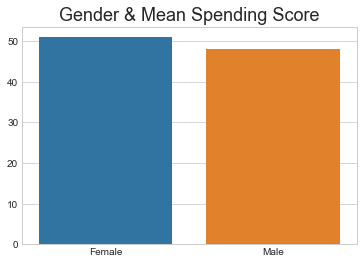

In [13]:
sns.barplot(x=['Female','Male'], y=S_score_mean)  
plt.title("Gender & Mean Spending Score", size='18')

#### Data Cleaning

In [14]:
# sum of all null values in every row
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
customers.drop(['CustomerID','Gender'],axis=1, inplace=True)

In [16]:
customers.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### Standardizing Data


In [17]:
scalar = StandardScaler()
scaled_customers = scalar.fit_transform(customers)

#### Relationship between factors

Text(0.5, 1.0, 'Age - Spending Score')

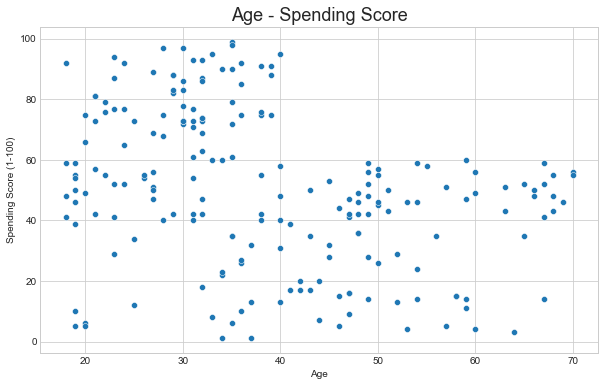

In [44]:
# Let's look at the relationship between Age and Spending score
plt.figure(figsize=(10,6))
sns.scatterplot(x = customers['Age'], y = customers['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 18)

Text(0.5, 1.0, 'Annual Income (k$) - Spending Score')

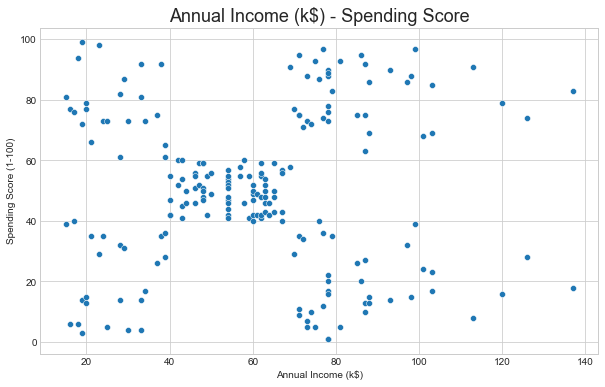

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = customers['Annual Income (k$)'], y = customers['Spending Score (1-100)'])
plt.title('Annual Income (k$) - Spending Score', size = 18)

Text(0.5, 1.0, 'Age - Annual Income (k$)')

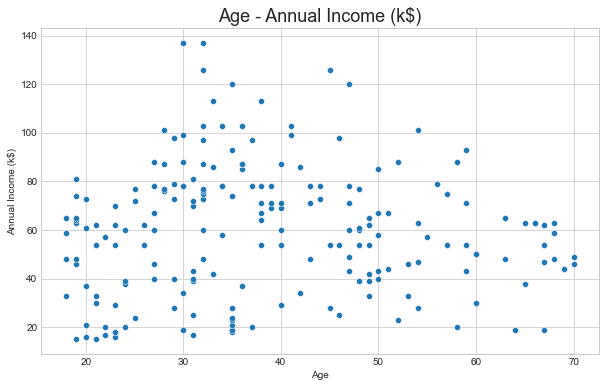

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = customers['Age'], y = customers['Annual Income (k$)'])
plt.title('Age - Annual Income (k$)', size = 18)

#### Building the model 


In [110]:
########### K-means algorithm using elbow method to find optimal amount of clusters ############

#import Kmeans
from sklearn.cluster import KMeans
# cluster sums

def elbow_method(data):
    #################################### ELBOW METHOD #######################################
    cluster_sum = []
    # we now need to create code for the elbow method
    # we often use 10 as the maxium amount of clusters
    for i in range (1,11):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data) # traning instances to cluster
        cluster_sum.append(kmeans.inertia_) 
        #inertia_ is used to segregate the data points into clusters
        

    #################################  GRAPH VISUALIZATION ################################### 
    # we also create the graph visulsation inside the elbow_method
    # now we have to visualize the elbow method to find out the optimal value of k for X1
    fig, ax = plt.subplots(figsize=(15, 8))# size of graph
    fig.patch.set_facecolor('white') # colour of face/background
    fig.patch.set_alpha(1.0) # size of face/background
    ax = sns.lineplot(range(1,11), cluster_sum, marker='o')
    ax.set_ylabel("Elbow Method",fontweight="bold")
    ax.set_xlabel("Number of Clusters",fontweight="bold")
    ax.set_title("Sum of Clusters",fontweight="bold")
    plt.grid()
    plt.show()
    

In [22]:

#Function for Training K-Means Model on Given Data
def Kmeans_training(data, nummber_of_clusters):
    kmeans_model = KMeans(n_clusters= nummber_of_clusters, init='k-means++', random_state=0)
    y_means = kmeans_model.fit_predict(data)
    return(kmeans_model, y_means)

# kmean_model clustering where nummber_of_clusters is entered along side the dataset that we
# want to see the clustering of. the nummber_of_clusters = the K that is found when the 
# elbow method is done.

In [91]:
def cluster_visualization(data,nummber_of_clusters, y_means, xlabel, ylabel):
    
    ############################# CLUSTER GRAPH VISUALIZATION ##############################
    # customizing graph
    fig = plt.figure(figsize=(9, 7))
    fig.patch.set_facecolor("white")
    fig.patch.set_alpha(1.0)

################### FUNCTION FOR EACH CLUSTER COMPARSION ####################
    for i in range(0, nummber_of_clusters):
        plt.scatter(data[y_means == i, 0], data[y_means == i, 1 ], s=50, 
        label = 'Cluster' + str(i+1))
        data_centroids = kmeans_model.cluster_centers_
        plt.scatter(data_centroids[y_means, 0], data_centroids[y_means, 1], s = 70, 
        color = 'Black')
    
    # Adding labels and fonts
    plt.title('Clusters of customers', fontweight="bold")
    plt.xlabel(xlabel,fontweight="bold")
    plt.ylabel(ylabel,fontweight="bold")
    plt.legend()
    plt.show()

#### Visualizing all the clusters 


In [24]:
# we need feature selection for the model based on the dataset
# Annual Income (k$) and Spending Score (1-100) will be the 2 featues for X1
X1 = scaled_customers[:, [1,2]]

C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


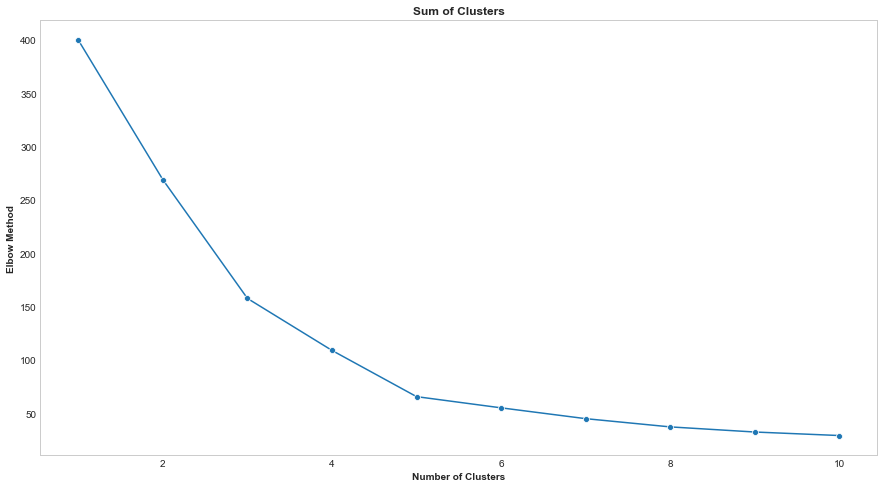

In [111]:
elbow_method(X1)

In [95]:
#Training the K-Means model on Annual Income and Spending Score
kmeans_model, y_means = Kmeans_training(X1, 5)
# we give the function Kmeans_traning the data and number of clusters where in the function
# using fit_predict we Compute cluster centers and predict cluster index for each sample.

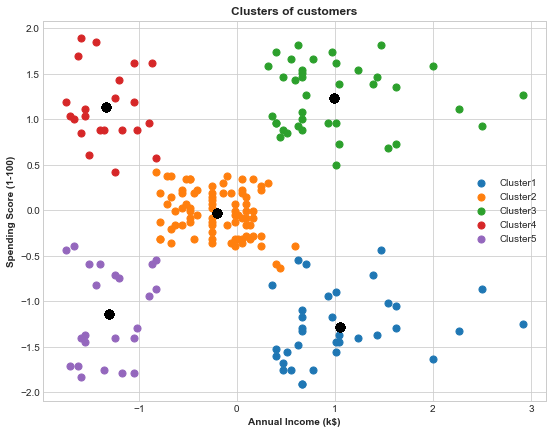

In [96]:
######################## Annual Income (k$) and Spending Score (1-100) #####################
cluster_visualization(X1, 5, y_means,
'Annual Income (k$)', 'Spending Score (1-100)')


In [28]:
# Age and Spending Score (1-100) will be the 2 featues for X2
X2 = scaled_customers[:, [0,2]]

C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


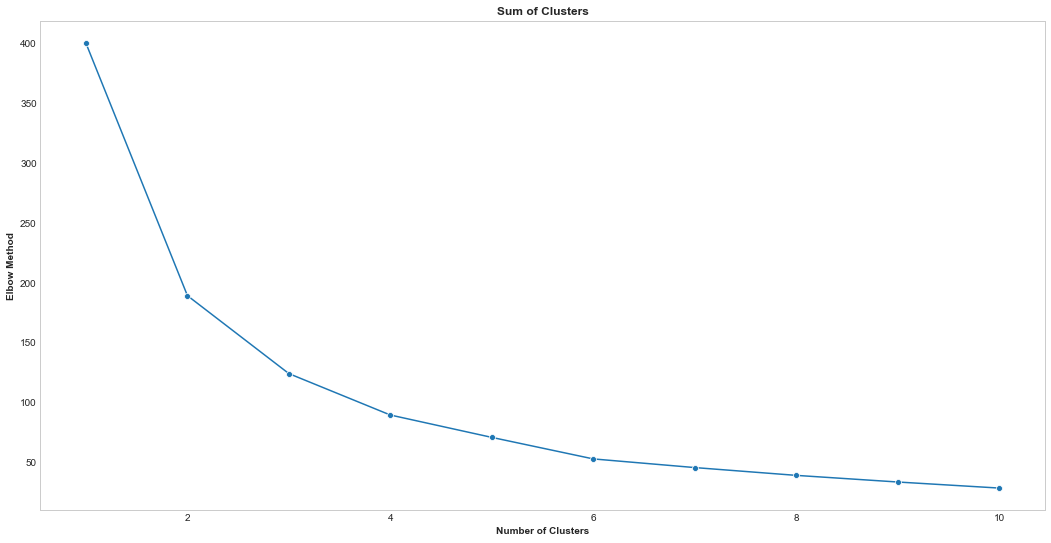

In [29]:
elbow_method(X2)

In [30]:
#Training the K-Means model on age and Spending Score
kmeans_model, y_means = Kmeans_training(X2, 4)

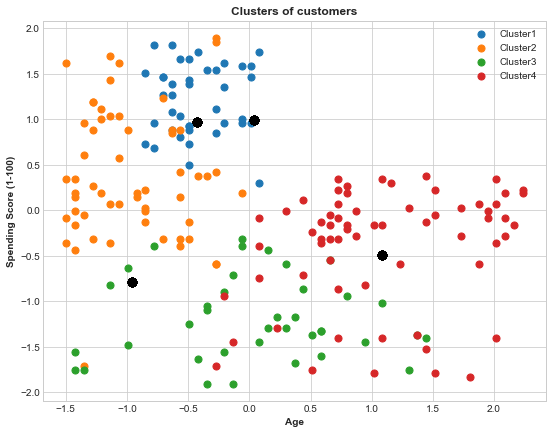

In [93]:
############################# Age and Spending Score (1-100) #############################
cluster_visualization(X2,4, y_means,'Age', 'Spending Score (1-100)')


In [48]:
X3 = scaled_customers[:, [0,1]]

C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


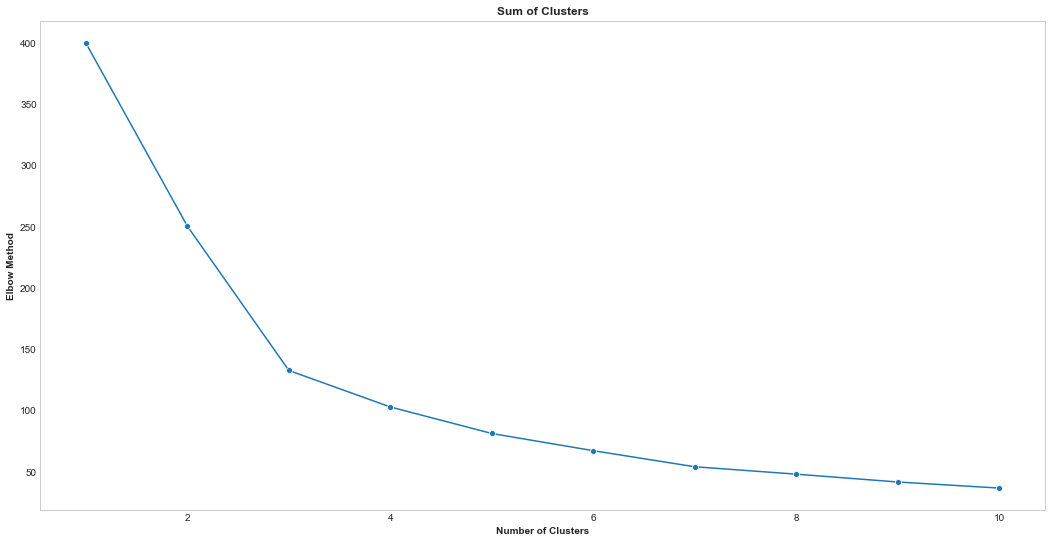

In [49]:
elbow_method(X3)


In [50]:
kmeans_model, y_means = Kmeans_training(X3, 5)

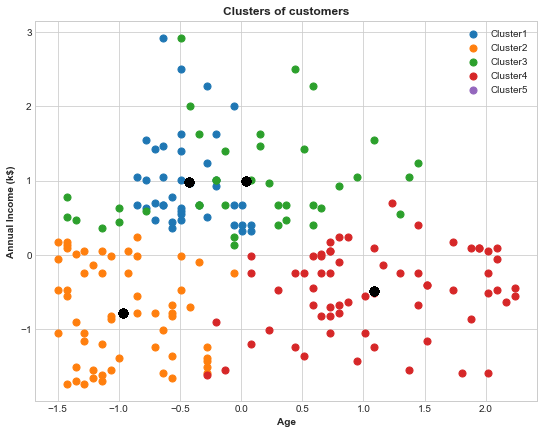

In [94]:
cluster_visualization(X3,5, y_means,'Age', 'Annual Income (k$)')

#### TSNE

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
customer_TSNE = tsne.fit_transform(scaled_customers)

C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


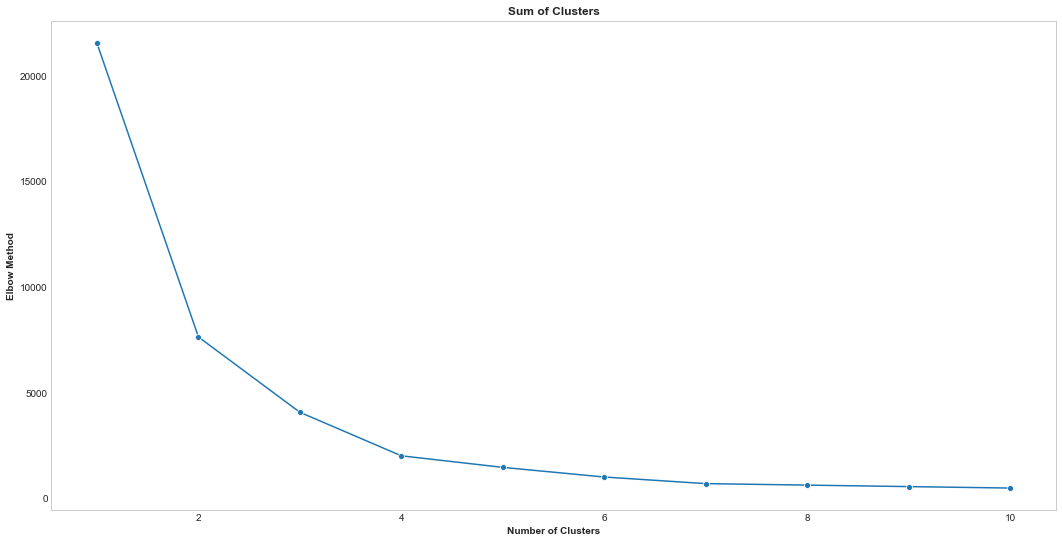

In [54]:
elbow_method(customer_TSNE)

In [97]:
kmeans_model, y_means = Kmeans_training(customer_TSNE, 4)

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

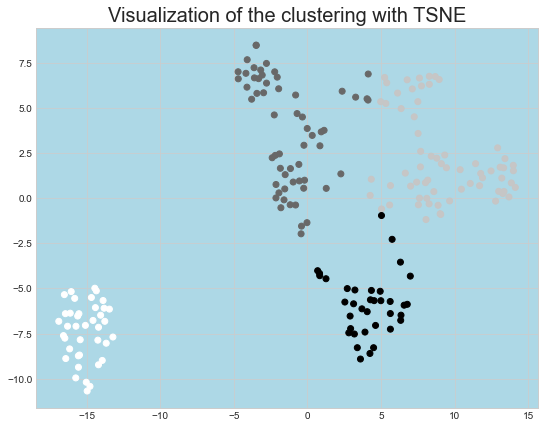

In [98]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_facecolor("lightblue")
ax.scatter(customer_TSNE[:,0], customer_TSNE[:,1], c = y_means)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

#### PCA

In [60]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # n_compnents = 2 since we want to reduced dimenions from 3 to 2
customer_PCA = pca.fit_transform(scaled_customers)
print(f'Customer data before PCA:\n {customers[0:5]}')
print( f'\n Customer data after PCA:\n {customer_PCA[0:5]}')

Customer data before PCA:
    Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

 Customer data after PCA:
 [[-0.61572002 -1.76348088]
 [-1.66579271 -1.82074695]
 [ 0.33786191 -1.67479894]
 [-1.45657325 -1.77242992]
 [-0.03846521 -1.66274012]]


vi har reducerat customers datan ifån 3 dimisoner till 2 dimisoner med hjälp av pca

C:\Users\gabri\miniconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


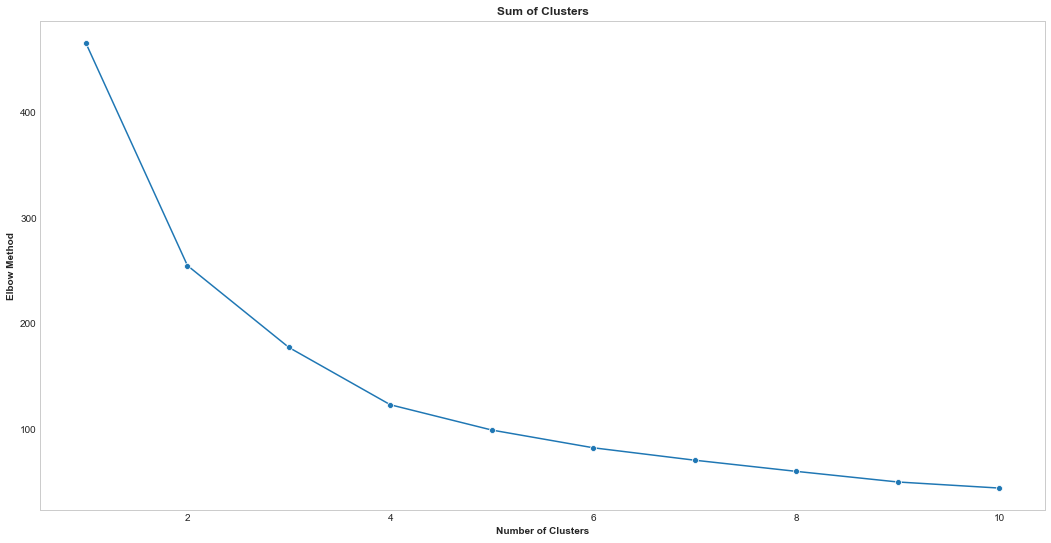

In [109]:
elbow_method(customer_PCA)
# 4 is optimal clusters

In [38]:
kmeans_model, y_means = Kmeans_training(customer_PCA, 4)
# fit the model with out data with selected number of compontens

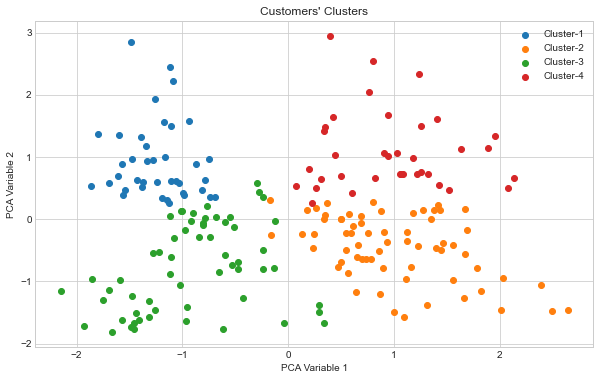

In [108]:
plt.figure(1 , figsize = (10 ,6))
plt.scatter(customer_PCA[y_means == 0, 0], customer_PCA[y_means == 0, 1], label = 'Cluster-1')
plt.scatter(customer_PCA[y_means == 1, 0], customer_PCA[y_means == 1, 1], label = 'Cluster-2')
plt.scatter(customer_PCA[y_means == 2, 0], customer_PCA[y_means == 2, 1], label = 'Cluster-3')
plt.scatter(customer_PCA[y_means == 3, 0], customer_PCA[y_means == 3, 1], label = 'Cluster-4')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable 1')
plt.ylabel('PCA Variable 2')
plt.legend()
plt.show();